In [105]:
import json
import math
import pandas as pd
import numpy as np
from keras.utils import to_categorical

In [106]:
with open("Target_Att_Dataset_AUC_50_SW_.json") as jsonfile:
    full_coordintate_dict = json.load(jsonfile)

In [107]:
meta_expl_att = {"p1": "Posture_Angle_L",
                 "p2": "Posture_Angle_R",
                 "p3": "Elbow_angle_L",
                 "p4": "Elbow_angle_R",
                 "p5": "Dist_Wrist-SW_L",
                 "p6": "Dist_Wrist-SW_R",
                 "p7": "Dist_Wrist-Ear_L",
                 "p8": "Dist_Wrist-Ear_L",
                 "p9": "Dist_Wrist-nose_L",
                 "p10": "Dist_Wrist-nose_R",
                 "p11": "Hor_Dist_Center_SW_Shoulder-Wrist_L",
                 "p12": "Hor_Dist_Center_SW_Shoulder-Wrist_R",
                 "p13": "Vert_Dist_Center_SW_Shoulder-Wrist_L",
                 "p14": "Vert_Dist_Center_SW_Shoulder-Wrist_R",
                 "p15": "Dist_Hor_Wrist-SW_R",
                 "p16": "Dist_Vert_Wrist-SW_R",
                 "p17": "Vector_Dist_Shoulders_L-R",
                 "p18": "Vector_Angle_Shoulders_L-R",
                 "p19": "Vector_Dist_Eyes_L-R",
                 "p20": "Vector_Dist_Ears_L-R",
                 }

In [108]:
df = pd.DataFrame(list(meta_expl_att.items()), columns=["Column Name", "Description"])


print(list(df["Description"]))

['Posture_Angle_L', 'Posture_Angle_R', 'Elbow_angle_L', 'Elbow_angle_R', 'Dist_Wrist-SW_L', 'Dist_Wrist-SW_R', 'Dist_Wrist-Ear_L', 'Dist_Wrist-Ear_L', 'Dist_Wrist-nose_L', 'Dist_Wrist-nose_R', 'Hor_Dist_Center_SW_Shoulder-Wrist_L', 'Hor_Dist_Center_SW_Shoulder-Wrist_R', 'Vert_Dist_Center_SW_Shoulder-Wrist_L', 'Vert_Dist_Center_SW_Shoulder-Wrist_R', 'Dist_Hor_Wrist-SW_R', 'Dist_Vert_Wrist-SW_R', 'Vector_Dist_Shoulders_L-R', 'Vector_Angle_Shoulders_L-R', 'Vector_Dist_Eyes_L-R', 'Vector_Dist_Ears_L-R']


In [109]:
full_coordintate_dict

{'c0': {'1001.jpg': [68.96515453544698,
   65.08787845491506,
   -5.572983500621252,
   47.30814726553529,
   0.08209710826553268,
   0.2048250028202213,
   0.2789802429537307,
   0.4495019858439896,
   0.24361426636876782,
   0.41186832651588,
   0.03933471441268921,
   0.00010290741920471191,
   0.013364255428314209,
   -0.3325014114379883,
   0.034340083599090576,
   -0.2019258290529251,
   0.16870411486156275,
   97.01453772317466,
   0.029433612661899707,
   0.090129927412366],
  '1003.jpg': [66.78787423524281,
   67.90681101322252,
   16.362351471217227,
   47.0135995142832,
   0.1370883551377573,
   0.18515457185632134,
   0.33668089696907616,
   0.4437177093884107,
   0.29770954308383335,
   0.4156852993236368,
   0.06672543287277222,
   0.012745127081871033,
   -0.10177111625671387,
   -0.2752116769552231,
   0.041630566120147705,
   -0.18041372299194336,
   0.1414096740156848,
   72.4860766065754,
   0.030900911775708428,
   0.08992976918860933],
  '1004.jpg': [63.59050984379

In [110]:
x_values = []
y_values = []
for cls, class_data in full_coordintate_dict.items():
    for Coord_type, points in class_data.items():
        x_values.append(points)
        y_values.append(cls)

X = np.array(x_values)
y = np.array(y_values)

In [111]:
X[0]

array([ 6.89651545e+01,  6.50878785e+01, -5.57298350e+00,  4.73081473e+01,
        8.20971083e-02,  2.04825003e-01,  2.78980243e-01,  4.49501986e-01,
        2.43614266e-01,  4.11868327e-01,  3.93347144e-02,  1.02907419e-04,
        1.33642554e-02, -3.32501411e-01,  3.43400836e-02, -2.01925829e-01,
        1.68704115e-01,  9.70145377e+01,  2.94336127e-02,  9.01299274e-02])

In [112]:
y = pd.Categorical(y)

APPLY STANDARDIZATION

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True)


tree_classifier = DecisionTreeClassifier(criterion="entropy")

tree_classifier.fit(X_train, y_train)

y_pred = tree_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8803061934585943


In [114]:
X_train.shape

(5745, 20)

In [115]:
meta = {'c0': "Focussed",
         'c1' : "V-Phone Right",
           'c2': "C-Phone Right", 
           'c3': "V-Phone Left", 
           'c4': "C-Phone Left", 
           'c5': "Radio", 
           'c6': "Drinking", 
           'c7': "Back Seat Reach", 
           'c8': "Manual", 
           'c9': "Visual"
}

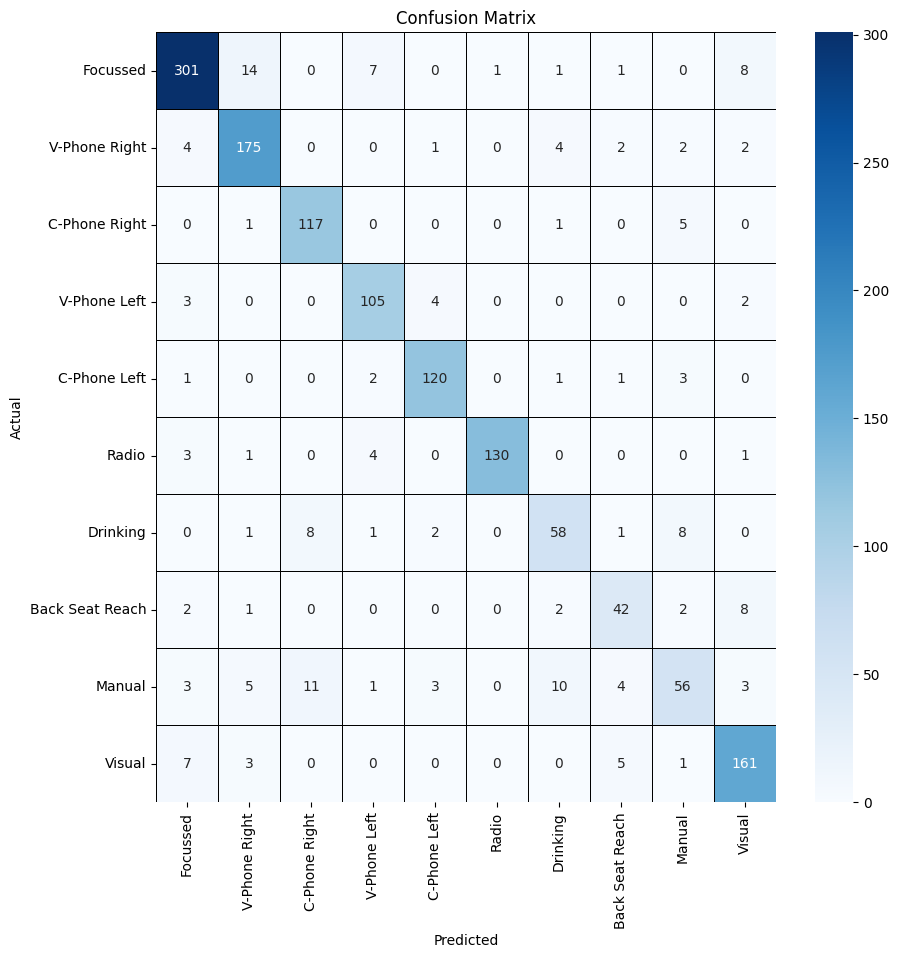

In [116]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
ticks = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5, 9.5]
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))

sns.heatmap(confusion, cmap="Blues", annot=True, fmt = ".5g", cbar=True, linewidths = 0.5,linecolor="black")
plt.xticks(ticks=ticks, labels=list(meta.values()), rotation=90)
plt.yticks(ticks=ticks, labels=list(meta.values()), rotation=-0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [117]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score, confusion_matrix
f1 = f1_score(y_test, y_pred, average="weighted")
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
print("f1:        " + str(f1))
print("Precision: " + str(precision))
print("recall:    " + str(recall))

f1:        0.8787312976635245
Precision: 0.879203728521611
recall:    0.8803061934585943


Dont Run Unless you want to view decision tree

In [118]:
# from sklearn.tree import export_graphviz
# import graphviz
# dot_data = export_graphviz(tree_classifier, out_file=None, 
#                            feature_names= list(meta_expl_att.values()),  
#                            class_names = list(meta.values()),  
#                            filled=True, rounded=True,  
#                            special_characters=True)  
# graph = graphviz.Source(dot_data)
# graph.render("Attribute_decision_Tree_gini")
# graph.view()


In [119]:
import joblib
joblib.dump(tree_classifier, "Decision_tree_Entropy.joblib")

['Decision_tree_Entropy.joblib']